In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Gerando dados falsos
categorias = ['Eletrônicos', 'Roupas', 'Alimentos', 'Livros', 'Brinquedos']
datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
num_registros = len(datas)

In [3]:
# Criando DataFrame
data = {
       'Data': np.random.choice(datas, num_registros),
       'Categoria': np.random.choice(categorias, num_registros),
       'Quantidade_Vendida': np.random.randint(1, 160, num_registros),
       'Preco_Unitario': np.round(np.random.uniform(10, 1100, num_registros), 2)
   }
df = pd.DataFrame(data)
df['Valor_Total'] = df['Quantidade_Vendida'] * df['Preco_Unitario']

In [4]:
# Salvando o DataFrame em um arquivo CSV
df.to_csv('dados_vendas.csv', index=False)

print("Conjunto de dados gerado e salvo como 'dados_vendas.csv'.")

Conjunto de dados gerado e salvo como 'dados_vendas.csv'.


In [5]:
#Carregando dados CSV
df = pd.read_csv('dados_vendas.csv')

In [6]:
#Descobrir quantidade de linhas e colunas
df.shape

(365, 5)

**Pergunta 1: Quantas linhas e colunas existem no DataFrame carregado?**

Existem 365 linhas e 5 colunas


In [7]:
#Mostrar o tipo de dados
df.dtypes

Data                   object
Categoria              object
Quantidade_Vendida      int64
Preco_Unitario        float64
Valor_Total           float64
dtype: object

**Pergunta 2: Quais são os tipos de dados (dtypes) das colunas?**

Os dados das colunas são: data sendo um object, categoria sendo um object, quantidade vendida sendo int, preço unitario sendo float, valor total sendo float.

In [8]:
# Exibe as 5 primeiras linhas
print(df.head())

         Data    Categoria  Quantidade_Vendida  Preco_Unitario  Valor_Total
0  2023-06-06   Brinquedos                  35          700.59     24520.65
1  2023-07-12  Eletrônicos                  42          780.76     32791.92
2  2023-09-12   Brinquedos                  36          901.62     32458.32
3  2023-03-05    Alimentos                  68          221.30     15048.40
4  2023-07-19    Alimentos                  52          971.42     50513.84


In [9]:
#Quantidade de categorias unicas
categorias_unicas = df['Categoria'].unique()
numero_categorias = len(categorias_unicas)
print(f"Estão presentes {numero_categorias} categorias únicas de produto.")

Estão presentes 5 categorias únicas de produto.


In [10]:
#Filtrar os dados para mostrar apenas as vendas da categoria 'Eletrônicos':
eletronicos = df[df['Categoria'] == 'Eletrônicos']
print(eletronicos)

           Data    Categoria  Quantidade_Vendida  Preco_Unitario  Valor_Total
1    2023-07-12  Eletrônicos                  42          780.76     32791.92
8    2023-08-31  Eletrônicos                  26          759.32     19742.32
13   2023-01-26  Eletrônicos                   3          997.77      2993.31
14   2023-05-24  Eletrônicos                 139           97.94     13613.66
15   2023-06-21  Eletrônicos                 151          908.09    137121.59
..          ...          ...                 ...             ...          ...
351  2023-12-24  Eletrônicos                 122          802.17     97864.74
353  2023-12-16  Eletrônicos                 124           14.94      1852.56
354  2023-04-15  Eletrônicos                 154          978.98    150762.92
357  2023-06-06  Eletrônicos                 101          447.21     45168.21
364  2023-10-25  Eletrônicos                  86          583.12     50148.32

[81 rows x 5 columns]


In [11]:
agrupado_media = df.groupby('Categoria')['Valor_Total'].mean()


In [12]:
agrupado_media

Categoria
Alimentos      33911.476944
Brinquedos     40160.953649
Eletrônicos    47346.598765
Livros         41195.197231
Roupas         44284.231781
Name: Valor_Total, dtype: float64

**Pergunta 4: Qual é a média do valor total das vendas na categoria 'Eletrônicos'?**

A média d valor total das vendas da categoria eletrônicos é R$ 4751.63

In [13]:
# Filtrar as vendas acima de R$ 1000:
vendas_acima_1000 = df[df['Valor_Total'] > 1000]
print(vendas_acima_1000)

           Data    Categoria  Quantidade_Vendida  Preco_Unitario  Valor_Total
0    2023-06-06   Brinquedos                  35          700.59     24520.65
1    2023-07-12  Eletrônicos                  42          780.76     32791.92
2    2023-09-12   Brinquedos                  36          901.62     32458.32
3    2023-03-05    Alimentos                  68          221.30     15048.40
4    2023-07-19    Alimentos                  52          971.42     50513.84
..          ...          ...                 ...             ...          ...
359  2023-04-08       Roupas                  98          647.19     63424.62
360  2023-10-20   Brinquedos                  35          699.79     24492.65
361  2023-09-27       Livros                 115          148.39     17064.85
363  2023-02-06       Livros                 111          219.32     24344.52
364  2023-10-25  Eletrônicos                  86          583.12     50148.32

[355 rows x 5 columns]


In [14]:
vendas_acima_1000 = df[df['Valor_Total'] > 1000]
quantidade_vendas_acima_1000 = len(vendas_acima_1000)
print(quantidade_vendas_acima_1000)

355


**Pergunta 5: Quantas vendas acima de R$ 1000 ocorreram?**

Houve 355 vendas com valor cima de R$ 1000.

In [15]:
##**Agrupar os dados por categoria e calcular o total de vendas por categoria:##
total_por_categoria = df.groupby('Categoria')['Valor_Total'].sum().reset_index()
print(total_por_categoria)

     Categoria  Valor_Total
0    Alimentos   2441626.34
1   Brinquedos   2971910.57
2  Eletrônicos   3835074.50
3       Livros   2677687.82
4       Roupas   3232748.92


**Pergunta 6: Qual categoria teve o maior valor total de vendas?**

A categoria que teve o maior valor de vendas foi de eletrônoico

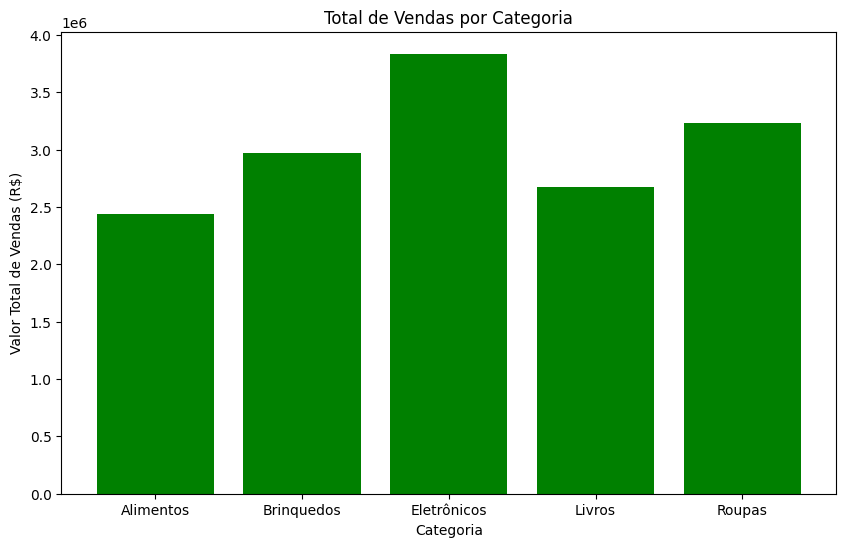

In [20]:
##Criar um gráfico de barras mostrando o total de vendas por categoria:

plt.figure(figsize=(10, 6))
plt.bar(total_por_categoria['Categoria'], total_por_categoria['Valor_Total'], color='green')
plt.xlabel('Categoria')
plt.ylabel('Valor Total de Vendas (R$)')
plt.title('Total de Vendas por Categoria')
plt.show()

**Pergunta 8: Com base no gráfico, qual categoria visualmente se destaca em termos de vendas totais?**

Com base no gráfico o que mais se destaca em termos totais de vendas é a categoria de eletrônicos.

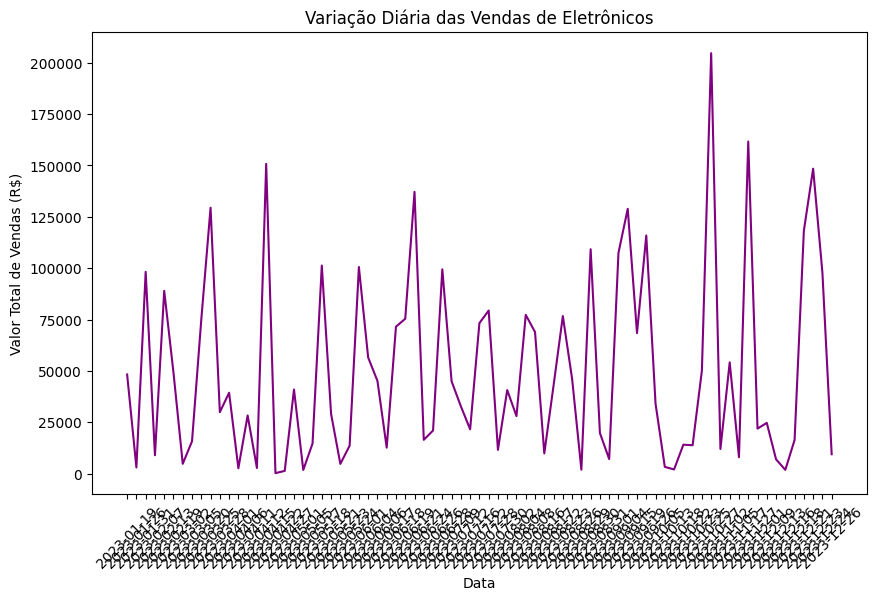

In [22]:
##**Criar um gráfico de linha mostrando a variação diária das vendas de 'Eletrônicos':

vendas_diarias = eletronicos.groupby('Data')['Valor_Total'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(vendas_diarias['Data'], vendas_diarias['Valor_Total'], color='purple')
plt.xlabel('Data')
plt.ylabel('Valor Total de Vendas (R$)')
plt.title('Variação Diária das Vendas de Eletrônicos')
plt.xticks(rotation=45)
plt.show()

**Pergunta 9: Existe algum padrão ou tendência observável nas vendas diárias de eletrônicos?**

Podemos obervar que houve um pico de vendas de eletrônicos a segunda quinzena de Outubro.

